## Importing required libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing dataset
Dataset link - https://www.kaggle.com/datasets/ddosad/global-terrorism-index-2023


In [16]:
df = pd.read_excel("Global Terrorism Index 2023.xlsx")

## Preview of the dataset

In [17]:
df.head(10)

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012
5,NGA,Nigeria,6,8.098342,212,767,496,9,2012
6,SOM,Somalia,7,7.964123,166,446,427,1,2012
7,IND,India,8,7.814715,219,150,256,41,2012
8,THA,Thailand,9,7.499810,199,184,493,0,2012
9,RUS,Russia,10,7.490145,219,157,309,3,2012


#### Overview of data:
1. iso3c: ISO 3166-1 alpha-3 code of the country where the incident occurred.
2. Country: Name of the country where the incident occurred.
3. Rank: Rank of the country based on the number of incidents.
4. Score: Score of the country based on the number of incidents, fatalities, injuries, and hostages.
5. Incidents: Number of terrorist incidents in the country.
6. Fatalities: Number of fatalities due to terrorist incidents in the country.
7. Injuries: Number of injuries due to terrorist incidents in the country.
8. Hostages: Number of hostages taken due to terrorist incidents in the country.
9. Year: Year in which the terrorist incident occurred.

## Data Exploratoin:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3c       1793 non-null   object 
 1   Country     1793 non-null   object 
 2   Rank        1793 non-null   int64  
 3   Score       1793 non-null   float64
 4   Incidents   1793 non-null   int64  
 5   Fatalities  1793 non-null   int64  
 6   Injuries    1793 non-null   int64  
 7   Hostages    1793 non-null   int64  
 8   Year        1793 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 126.2+ KB


In [19]:
df.describe()

,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.00000
mean,71.691578,2.442817,26.699944,53.537646,74.588957,10.149470,2017.00000
std,35.235705,2.654876,109.500965,253.912698,415.669549,82.306937,3.16316
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.00000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.00000
50%,82.000000,1.534965,0.000000,0.000000,0.000000,0.000000,2017.00000
75%,106.000000,4.419243,4.000000,2.000000,4.000000,0.000000,2020.00000
max,112.000000,10.000000,1673.000000,4514.000000,9479.000000,2727.000000,2022.00000


In [20]:
df.columns

Index(['iso3c', 'Country', 'Rank', 'Score', 'Incidents', 'Fatalities',
       'Injuries', 'Hostages', 'Year'],
      dtype='object')

In [21]:
df.dtypes

iso3c          object
Country        object
Rank            int64
Score         float64
Incidents       int64
Fatalities      int64
Injuries        int64
Hostages        int64
Year            int64
dtype: object

In [22]:
df.shape

(1793, 9)

## Data Preprocessing:
1. Checking for missing values
2. Removing duplicates

In [23]:
# Checking for missing values
df.isnull().sum()

iso3c         0
Country       0
Rank          0
Score         0
Incidents     0
Fatalities    0
Injuries      0
Hostages      0
Year          0
dtype: int64

### Insights:
* There are no missing values in the data.

In [24]:
# Removing duplicate values
df.drop_duplicates(inplace=True)

In [25]:
df.head(2)

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012


## Data Visualization and Analysis
1. To get insights towards year
2. To get insights towards country

In [26]:
# Grouping number of Incidents, Fatalities, Injuries and Hostages by year
Incidents_by_year = df.groupby(df["Year"])["Incidents"].sum()
Fatalities_by_year = df.groupby(df["Year"])["Fatalities"].sum()
Injuries_by_year = df.groupby(df["Year"])["Injuries"].sum()
Hostages_by_year = df.groupby(df["Year"])["Hostages"].sum()

In [27]:
print(f'incidents by year : {Incidents_by_year}')
print('----------------------')
print(f'fatalities by year : {Fatalities_by_year}')
print('----------------------')
print(f'injuries by year : {Injuries_by_year}')
print('----------------------')
print(f'hostages by year : {Hostages_by_year}')

incidents by year : Year
2012    4711
2013    4371
2014    3546
2015    3632
2016    4210
2017    4517
2018    4829
2019    4118
2020    4541
2021    5443
2022    3955
Name: Incidents, dtype: int64
----------------------
fatalities by year : Year
2012     9227
2013    10317
2014    10129
2015    10881
2016    10372
2017     8932
2018     7480
2019     7193
2020     7433
2021     7328
2022     6701
Name: Fatalities, dtype: int64
----------------------
injuries by year : Year
2012    16915
2013    19304
2014    13827
2015    17473
2016    10372
2017    14583
2018    10978
2019     9350
2020     7660
2021     7283
2022     5993
Name: Injuries, dtype: int64
----------------------
hostages by year : Year
2012     800
2013     734
2014     853
2015    1709
2016     403
2017     572
2018    1544
2019    9350
2020    1301
2021     599
2022     333
Name: Hostages, dtype: int64


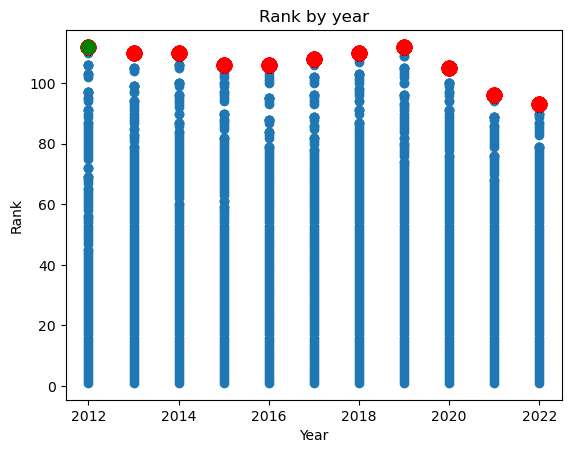

heighest year : 2012 with : 112


In [28]:
plt.scatter(df['Year'], df['Rank'])
maximum = dict()
for year in df['Year']:
    max_score = df[df['Year'] == year]['Rank'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Rank by year')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.show()
print(f'heighest year : {max(maximum,key=maximum.get)} with : {maximum[max(maximum,key=maximum.get)]}')

### Insights:
* from this we can say that in 2012 it has recoreded high rank of 112

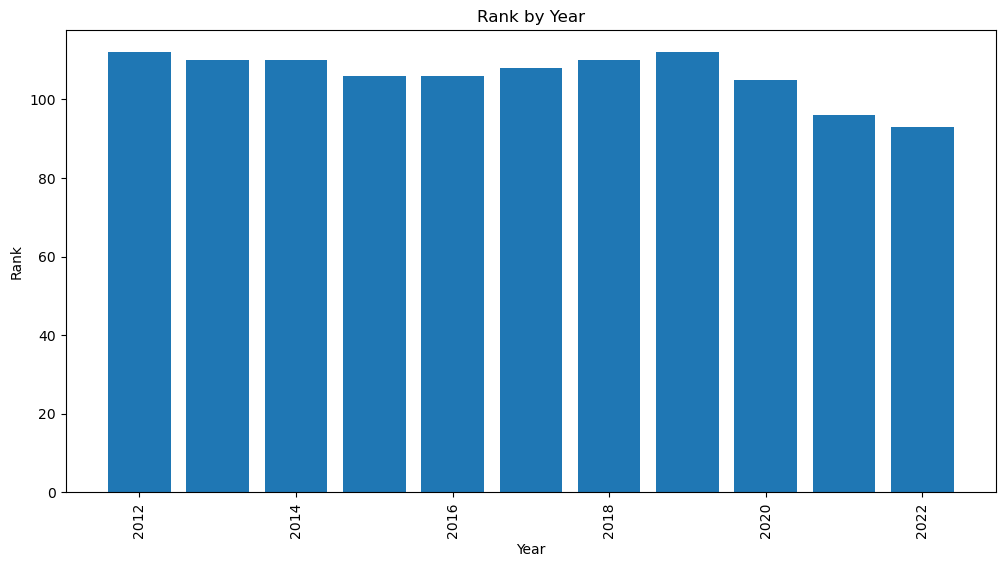

In [32]:
# Same as above plot
plt.figure(figsize=(12, 6))
plt.bar(df['Year'],df['Rank'])
plt.title('Rank by Year')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.xticks(rotation=90)
plt.show()

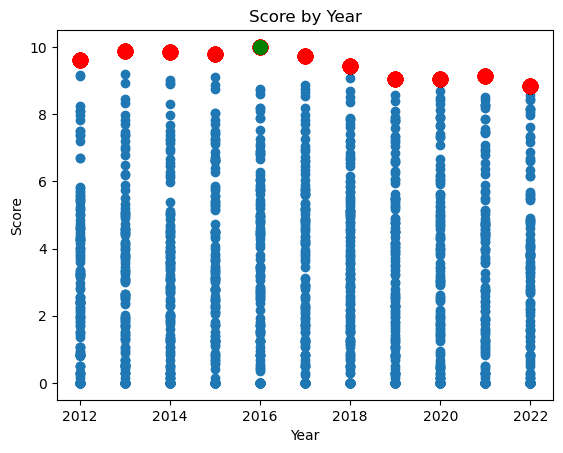

heighest year : 2016 with : 10.0


In [33]:
plt.scatter(df['Year'], df['Score'])
maximum = dict()
for year in df['Year']:
    max_score = df[df['Year'] == year]['Score'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Score by Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()
print(f'heighest year : {max(maximum,key=maximum.get)} with : {maximum[max(maximum,key=maximum.get)]}')

### Insights:
* Year 2016 has the highest score - here score is: Score of the country based on the number of incidents, fatalities, injuries, and hostages.


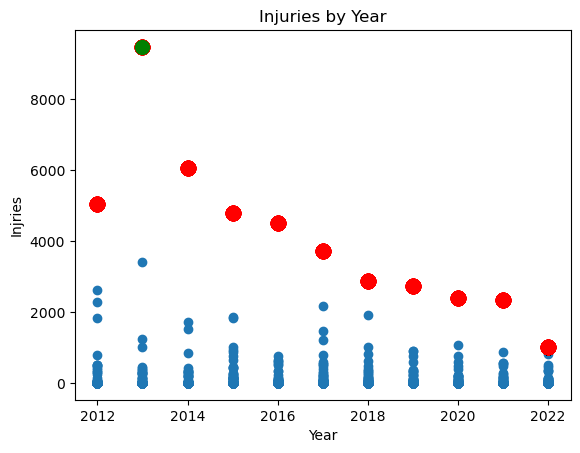

heighest time in year : 2013 with : 9479 injury


In [34]:
plt.scatter(df['Year'],df['Injuries'])
maximum = dict()
for year in df['Year']:
    max_score = df[df['Year'] == year]['Injuries'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Injries')
plt.show()
print(f'heighest time in year : {max(maximum,key=maximum.get)} with : {maximum[max(maximum,key=maximum.get)]} injury')

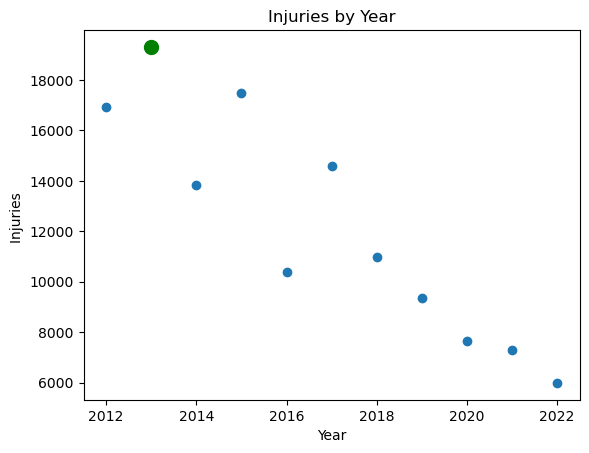

heighest injuries in year : 2013 with : 19304 injury


In [44]:
# Filter out None (or missing) values before finding the maximum
injuries_by_year2 = {year: count for year, count in Injuries_by_year.items() if count is not None}

# Find the year with the maximum injuries
year_with_max_injuries = max(injuries_by_year2, key=injuries_by_year2.get)

plt.scatter(df['Year'].unique(), Injuries_by_year)
plt.plot(year_with_max_injuries,Injuries_by_year.max(), marker='o', markersize=10, color="green")
plt.title('Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Injuries ')
plt.show()
plt.show()
print(f'heighest injuries in year : {year_with_max_injuries} with : {Injuries_by_year.max()} injury')

### Insights:
* Year 2013 has recoreded the high rate of injuries i.e 19304

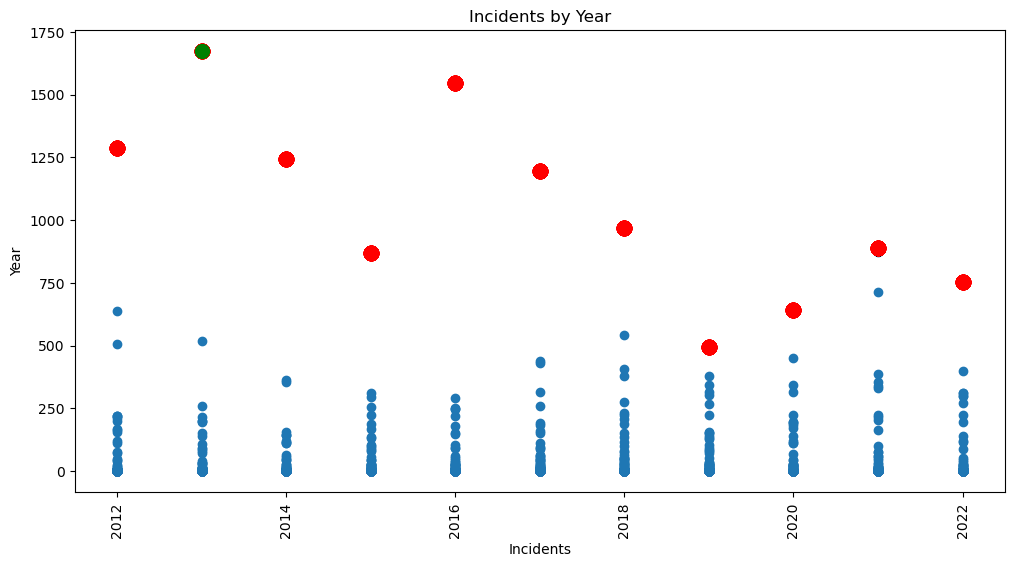

heighest time in year : 2013 with 1673 incident


In [36]:
plt.figure(figsize=(12,6))
plt.scatter(df['Year'],df['Incidents'])
maximum = dict()
for year in df['Year']:
    max_score = df[df['Year'] == year]['Incidents'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Incidents by Year')
plt.xlabel('Incidents')
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.show()
print(f'heighest time in year : {max(maximum,key=maximum.get)} with {maximum[max(maximum,key=maximum.get)]} incident')

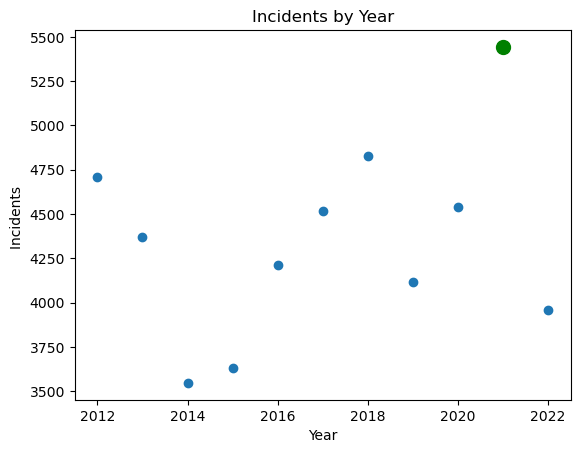

heighest incidents in year : 2021 with : 5443 incident


In [45]:
incidents_by_year2 = {year: count for year, count in Incidents_by_year.items() if count is not None}

year_with_max_incidents = max(incidents_by_year2, key=incidents_by_year2.get)

plt.scatter(df['Year'].unique(), Incidents_by_year)
plt.plot(year_with_max_incidents,Incidents_by_year.max(), marker='o', markersize=10, color="green")
plt.title('Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Incidents ')
plt.show()
plt.show()
print(f'heighest incidents in year : {year_with_max_incidents} with : {Incidents_by_year.max()} incident')

### Insights:
* Year 2021 has recorded high number of incidents of 5443

In [37]:
df.head(2)

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012


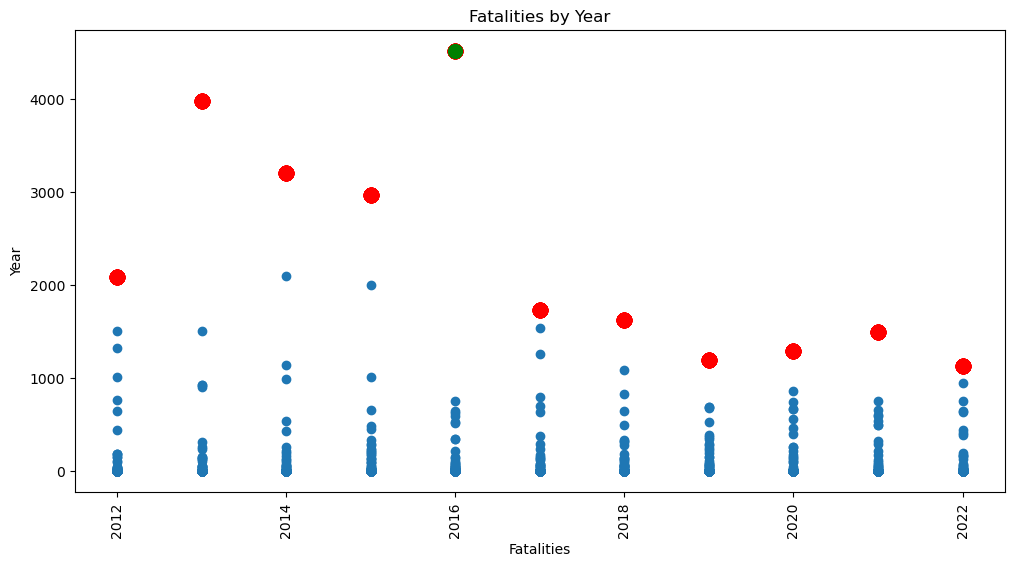

heighest time in year : 2016 with 4514 fatalities


In [38]:
plt.figure(figsize=(12,6))
plt.scatter(df['Year'],df['Fatalities'])
maximum = dict()
for year in df['Year']:
    max_score = df[df['Year'] == year]['Fatalities'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Fatalities by Year')
plt.xlabel('Fatalities')
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.show()
print(f'heighest time in year : {max(maximum,key=maximum.get)} with {maximum[max(maximum,key=maximum.get)]} fatalities')

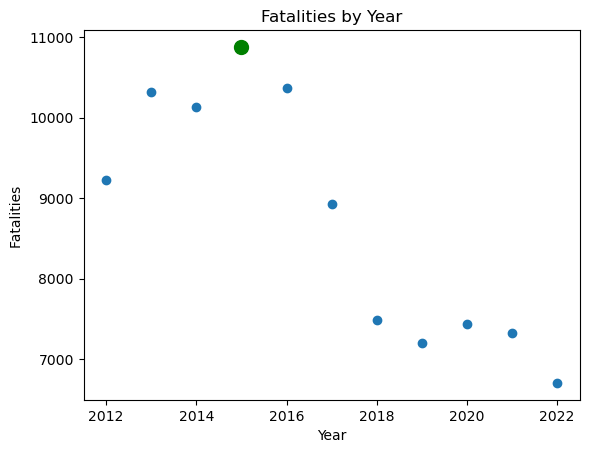

heighest fatalities in year : 2015 with : 10881 fatalities


In [46]:
Fatalities_by_year_2 = {year: count for year, count in Fatalities_by_year.items() if count is not None}

year_with_max_fatalities = max(Fatalities_by_year_2, key=Fatalities_by_year_2.get)

plt.scatter(df['Year'].unique(), Fatalities_by_year)
plt.plot(year_with_max_fatalities,Fatalities_by_year.max(), marker='o', markersize=10, color="green")
plt.title('Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Fatalities ')
plt.show()
plt.show()
print(f'heighest fatalities in year : {year_with_max_fatalities} with : {Fatalities_by_year.max()} fatalities')

### Insights:
* Year 2015 has recoreded more number of death due to terrorism i.e 10881 fatalities.

In [47]:
df.head(2)

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012


In [48]:
# Grouping number of Incidents, Fatalities, Injuries and Hostages by country
Incidents_by_country = df.groupby(df["Country"])["Incidents"].sum()
Fatalities_by_country = df.groupby(df["Country"])["Fatalities"].sum()
Injuries_by_country = df.groupby(df["Country"])["Injuries"].sum()
Hostages_by_country = df.groupby(df["Country"])["Hostages"].sum()

In [49]:
print(f'incidents by country : {Incidents_by_country}')
print('----------------------')
print(f'fatalities by country : {Fatalities_by_country}')
print('----------------------')
print(f'injuries by country : {Injuries_by_country}')
print('----------------------')
print(f'hostages by country : {Hostages_by_country}')

incidents by country : Country
Afghanistan    4443
Albania           0
Algeria         111
Angola            3
Argentina        35
               ... 
Venezuela        14
Vietnam           1
Yemen           833
Zambia            0
Zimbabwe          0
Name: Incidents, Length: 163, dtype: int64
----------------------
fatalities by country : Country
Afghanistan    12726
Albania            0
Algeria          196
Angola             0
Argentina          0
               ...  
Venezuela         38
Vietnam            0
Yemen           2547
Zambia             0
Zimbabwe           0
Name: Fatalities, Length: 163, dtype: int64
----------------------
injuries by country : Country
Afghanistan    21263
Albania            0
Algeria          240
Angola             0
Argentina          5
               ...  
Venezuela         19
Vietnam            1
Yemen           2992
Zambia             0
Zimbabwe           0
Name: Injuries, Length: 163, dtype: int64
----------------------
hostages by country : Count

In [64]:
# Filter out None values before finding the country with the highest number of injuries
filtered_incident_dict = {country: incidents for country, incidents in Incidents_by_country.items() if incidents is not None}

if filtered_incident_dict:
    # Find the country with the highest number of incidents
    max_country = max(filtered_incident_dict, key=filtered_incident_dict.get)

    # Get the maximum number of incidents
    max_incident = filtered_incident_dict[max_country]

    # Print the result
    print(f"The country with the highest number of injuries is {max_country} with {max_incident} incidents.")
else:
    print("No valid data in the dictionary.")

The country with the highest number of injuries is Iraq with 11183 incidents.


### Insights:
* Iraq is suffered with more number of attacks of count 11183

In [65]:

filtered_injuires_dict = {country: injuires for country, injuires in Injuries_by_country.items() if injuires is not None}

if filtered_injuires_dict:
    # Find the country with the highest number of injuries
    max_country = max(filtered_injuires_dict, key=filtered_injuires_dict.get)

    # Get the maximum number of injuries
    max_injuries = filtered_injuires_dict[max_country]

    # Print the result
    print(f"The country with the highest number of injuries is {max_country} with {max_injuries} injuries.")
else:
    print("No valid data in the dictionary.")

The country with the highest number of injuries is Iraq with 38381 injuries.


In [66]:

filtered_fatalities_dict = {country: fatalities for country, fatalities in Fatalities_by_country.items() if fatalities is not None}

if filtered_fatalities_dict:
    # Find the country with the highest number of fatalities
    max_country = max(filtered_fatalities_dict, key=filtered_fatalities_dict.get)

    # Get the maximum number of fatalities
    max_fatalities = filtered_fatalities_dict[max_country]

    # Print the result
    print(f"The country with the highest number of injuries is {max_country} with {max_fatalities} deaths.")
else:
    print("No valid data in the dictionary.")

The country with the highest number of injuries is Iraq with 21286 deaths.


### Insights:
* Iraq has suffered with more number of injuries and deaths due to terrorism.
* 38381 injuries and 21286 deaths.

## Information generated from the data:
1. Year 2012 has recoreded high rank of 112
2. Year 2016 has the highest score - 10.0
3. Year 2013 has recoreded the high rate of injuries i.e 19304
4. Year 2021 has recorded high number of incidents of 5443
5. Year 2015 has recoreded more number of death due to terrorism i.e 10881 fatalities.
6. Iraq is suffered with more number of attacks of count 11183
7. Iraq has suffered with more number of injuries and deaths due to terrorism. i.e, 38381 injuries and 21286 deaths.